<a href="https://colab.research.google.com/github/GENAMAGDY/Numerical_Optimization/blob/main/GD_Variants_Batch_Mini_Batch_Stochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [ ]:
X = np.linspace(0,20)
Y =  -2 * X +1

In [ ]:
print("X =", X)
print("Y =", Y)

X = [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y = [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [ ]:
def GradientDescent(X,Y,Learning_Rate,Iteration):
    Theta =[0,0]
    m = len(X)
   
    Loss_history = []
    Theta_0_his=[]
    Hypotheses_history =[]
    Theta_1_his =[]
    i =0
    for i in range(Iteration):
        Hypotheses = Theta[0] + Theta[1]*X
        Hypotheses_history.append(Hypotheses)
        CostFn = (1/(2*m))*np.sum((Hypotheses - Y)**2)
        Loss_history.append(CostFn)
        Theta[0] -= (Learning_Rate/m)*np.sum(Hypotheses - Y)
        Theta_0_his.append(Theta[0])
        Theta[1] -= (Learning_Rate/m)*np.sum((Hypotheses - Y)*X)
        Theta_1_his.append(Theta[1])
        
        error = (1/m)*np.sum(Hypotheses - Y)
        if error <= 0.001:
            break
        
    print("Number of Iteration Stop =",i)
    Hypotheses = Theta[0] + Theta[1]*X
    Hypotheses_history.append(Hypotheses)
    CostFn = (1/(2*m))*np.sum((Hypotheses - Y)**2)
    return Loss_history ,Theta_0_his  ,Theta_1_his,Hypotheses_history,Theta

#### Try your function with any input parameterss of your choice.

In [ ]:
Loss_history ,Theta_0_his  ,Theta_1_his,Hypotheses_history,Theta = GradientDescent(X,Y,0.001,100)
Theta

Number of Iteration Stop = 29


[-0.13189025415294872, -1.8913454996474413]

#### Calculate r2 score

In [ ]:
print("Score = ", r2_score(Y, Hypotheses))

Score =  0.9976984742382373


#### Plot loss vs. epochs

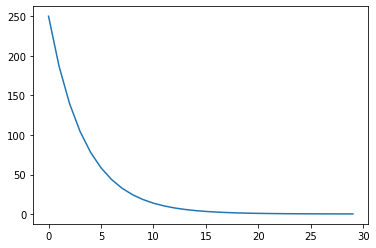

In [ ]:
plt.plot(Loss_history)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

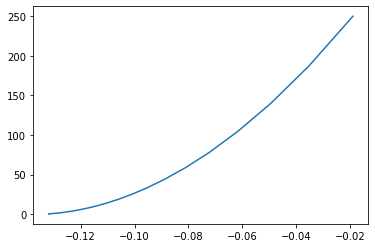

In [ ]:
plt.plot(Theta_0_his,Loss_history)
plt.show()

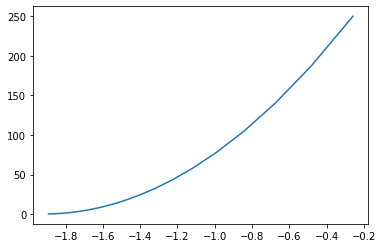

In [ ]:
plt.plot(Theta_1_his,Loss_history)
plt.show()

#### Plot all regression lines till converge

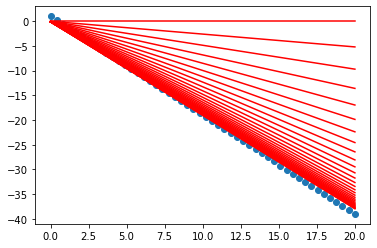

In [ ]:
plt.scatter(X,Y)
for h in Hypotheses_history:
    plt.plot(X,h , color='Red')
plt.show()

#### Plot the best regression line

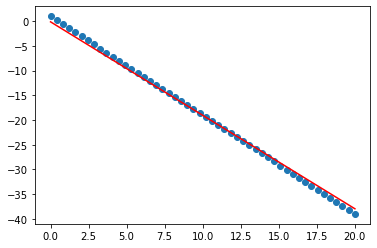

In [ ]:
plt.scatter(X,Y)
plt.plot(X,Hypotheses_history[-1] , color='Red')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [ ]:
def Divide_Batches(X,Y,NO_Batches):
    X_Batches=[]
    Y_Batches=[]
    Batch_Size = int(len(X)/NO_Batches)
    index=0
    for i in range(NO_Batches):
        if len(X) - index == 0:
            break
        elif len(X) - index < Batch_Size:
            X_Batches.append(X[index:])
            Y_Batches.append(Y[index:])
        else:
            X_Batches.append(X[index:index+Batch_Size])
            Y_Batches.append(Y[index:index+Batch_Size])
            index+=Batch_Size
    return X_Batches ,Y_Batches

In [ ]:
def Mini_Batch_GD(X,Y, Learnig_rate,Epochs, No_Batches):
    Theta_B = [0,0]
    X_Batches ,Y_Batches = Divide_Batches(X,Y,No_Batches)
    Cost_History=[]
    Theta_0_History=[]
    Theta_1_History=[]
    Hypotheses_History=[]
    
    i=0
    for i in range(Epochs):
        for j in range(No_Batches):
            m = len(X_Batches[j])
            Hypotheses_B = Theta_B[0]+Theta_B[1]*X_Batches[j]
            Hypotheses_History.append(Hypotheses_B)
            
            Cost_B = (1/(2*m)) * np.sum((Hypotheses_B-Y_Batches[j])**2)
            Cost_History.append(Cost_B)
            
            Theta_B[0] -= (Learnig_rate/m)*np.sum(Hypotheses_B-Y_Batches[j])
            Theta_0_History.append(Theta_B[0])
            Theta_B[1] -= (Learnig_rate/m)*np.dot((Hypotheses_B-Y_Batches[j]),X_Batches[j])
            Theta_1_History.append(Theta_B[1])
        
        Hypotheses = Theta_B[0]+Theta_B[1]*X
        error = (1/m)*np.sum(Hypotheses - Y)
        if error <= 0.001:
            break
    print("Number of epoches stop = ",i )
        
    return Theta_B,Cost_History,Theta_0_History, Theta_1_History,Hypotheses_History
            

In [ ]:
Theta_B,Cost_History,Theta_0_History, Theta_1_History,Hypotheses_History =Mini_Batch_GD(X,Y, 0.001,100,1)
Theta_B

Number of epoches stop =  28


[-0.13189728331162534, -1.8875131875364934]

In [ ]:
Y_predict = Theta_B[0] + Theta[1]*X
Hypotheses_History.append(Y_predict)
r2_score(Y,Y_predict)

0.9970337286184593

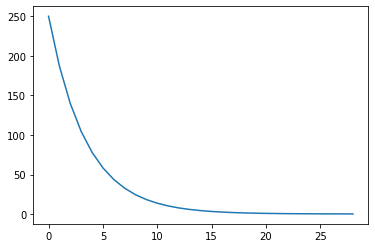

In [ ]:
plt.plot(Cost_History)
plt.show()

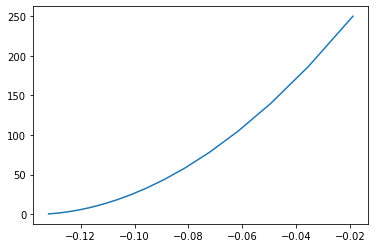

In [ ]:
plt.plot(Theta_0_History,Cost_History)
plt.show()

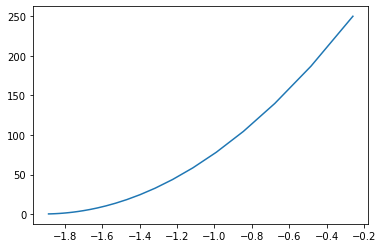

In [ ]:
plt.plot(Theta_1_History,Cost_History)
plt.show()

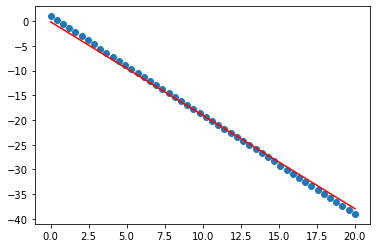

In [ ]:
plt.scatter(X,Y)
plt.plot(X,Hypotheses_History[-1],color='Red')
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [ ]:
def Stochastic_GD_withMiniBatches(X,Y,Learning_rate,Epochs):
    Theta_S = [0,0]
    X_Batches ,Y_Batches = Divide_Batches(X,Y,len(X))
    Cost_History=[]
    Theta_0_History=[]
    Theta_1_History=[]
    Hypotheses_History=[]
    i=0
    for i in range(Epochs):
        for j in range(len(X_Batches)):
            Hypotheses_B = Theta_S[0]+Theta_S[1]*X_Batches[j]
            
            Hypotheses_History.append(Hypotheses_B)
            Cost_B = np.sum((Hypotheses_B-Y_Batches[j])**2)
            Cost_History.append(Cost_B)
            
            Theta_S[0] -= Learning_rate*np.sum(Hypotheses_B-Y_Batches[j])
            Theta_0_History.append(Theta_S[0])
            
            Theta_S[1] -= Learning_rate*np.dot((Hypotheses_B-Y_Batches[j]),X_Batches[j])
            Theta_1_History.append(Theta_S[1])
            
        
    return Theta_S ,Cost_History,Theta_0_History, Theta_1_History,Hypotheses_History
    

In [ ]:
Theta_S,Cost_History_S,Theta_0_History_S, Theta_1_History_S,Hypotheses_History_S = Stochastic_GD_withMiniBatches(X,Y,0.0001,100)
Theta_S

[-0.01421715367212408, -1.9295673109552176]

In [ ]:
Y_pre_Stochastic = Theta_S[0] + Theta_S[1]*X
Hypotheses_History_S.append(Y_pre_Stochastic)
r2_score(Y,Y_pre_Stochastic)

0.9980678139627714

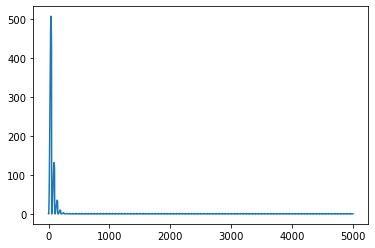

In [ ]:
plt.plot(Cost_History_S)
plt.show()

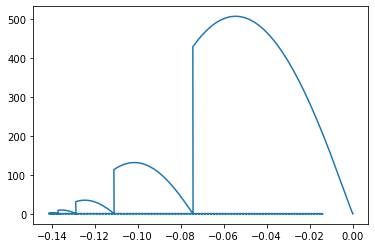

In [ ]:
plt.plot(Theta_0_History_S,Cost_History_S)
plt.show()

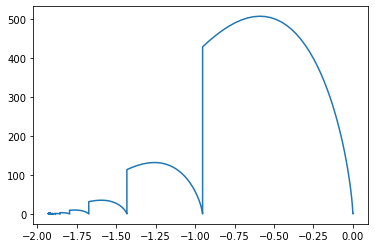

In [ ]:
plt.plot(Theta_1_History_S,Cost_History_S)
plt.show()

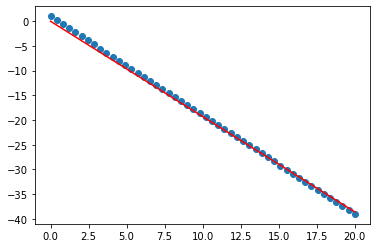

In [ ]:
plt.scatter(X,Y)
plt.plot(X,Hypotheses_History_S[-1],color='Red')
plt.show()